In [1]:
#Importing the necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [2]:
forest= pd.read_csv('forest_fires.csv')
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

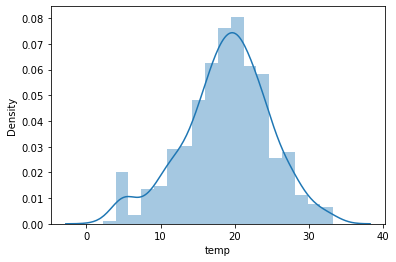

In [7]:
sns.distplot(forest['temp'])

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

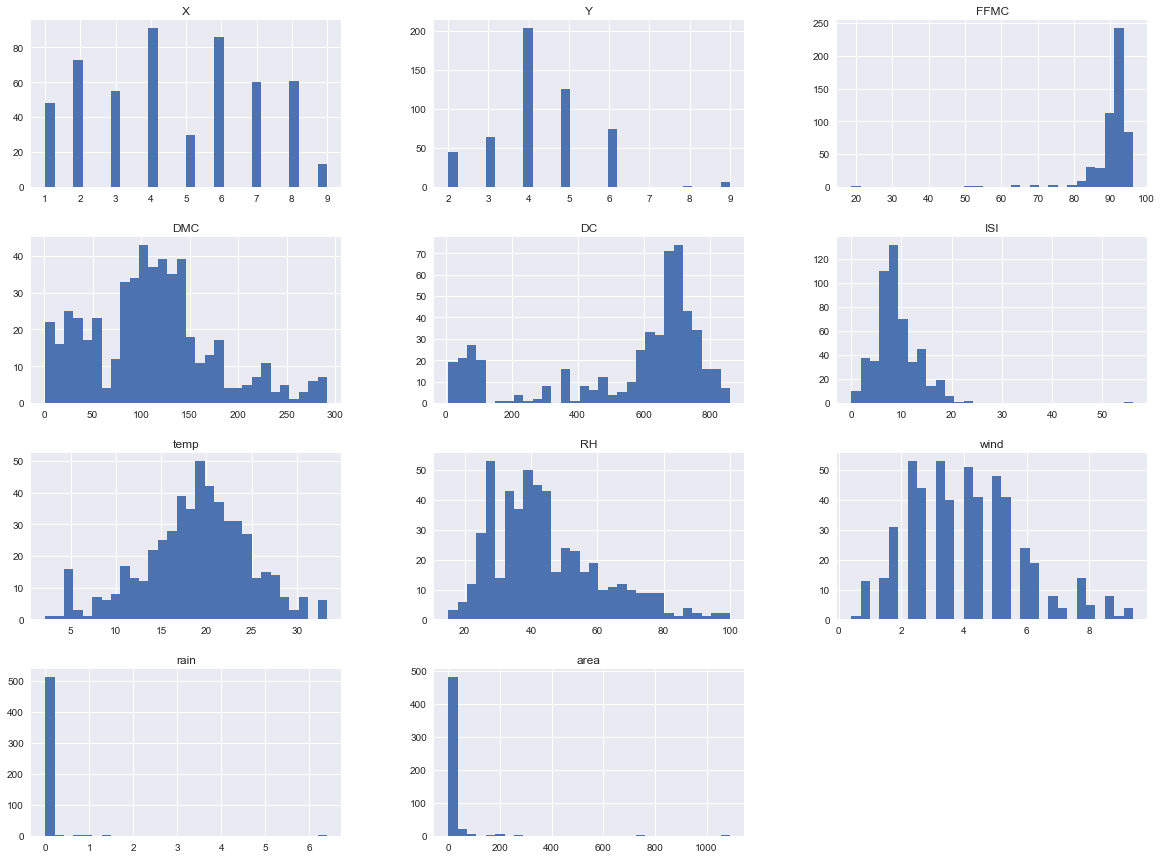

In [9]:
plt.style.use('seaborn')
forest.hist(bins=30, figsize=(20,15)) # plotting the histogram

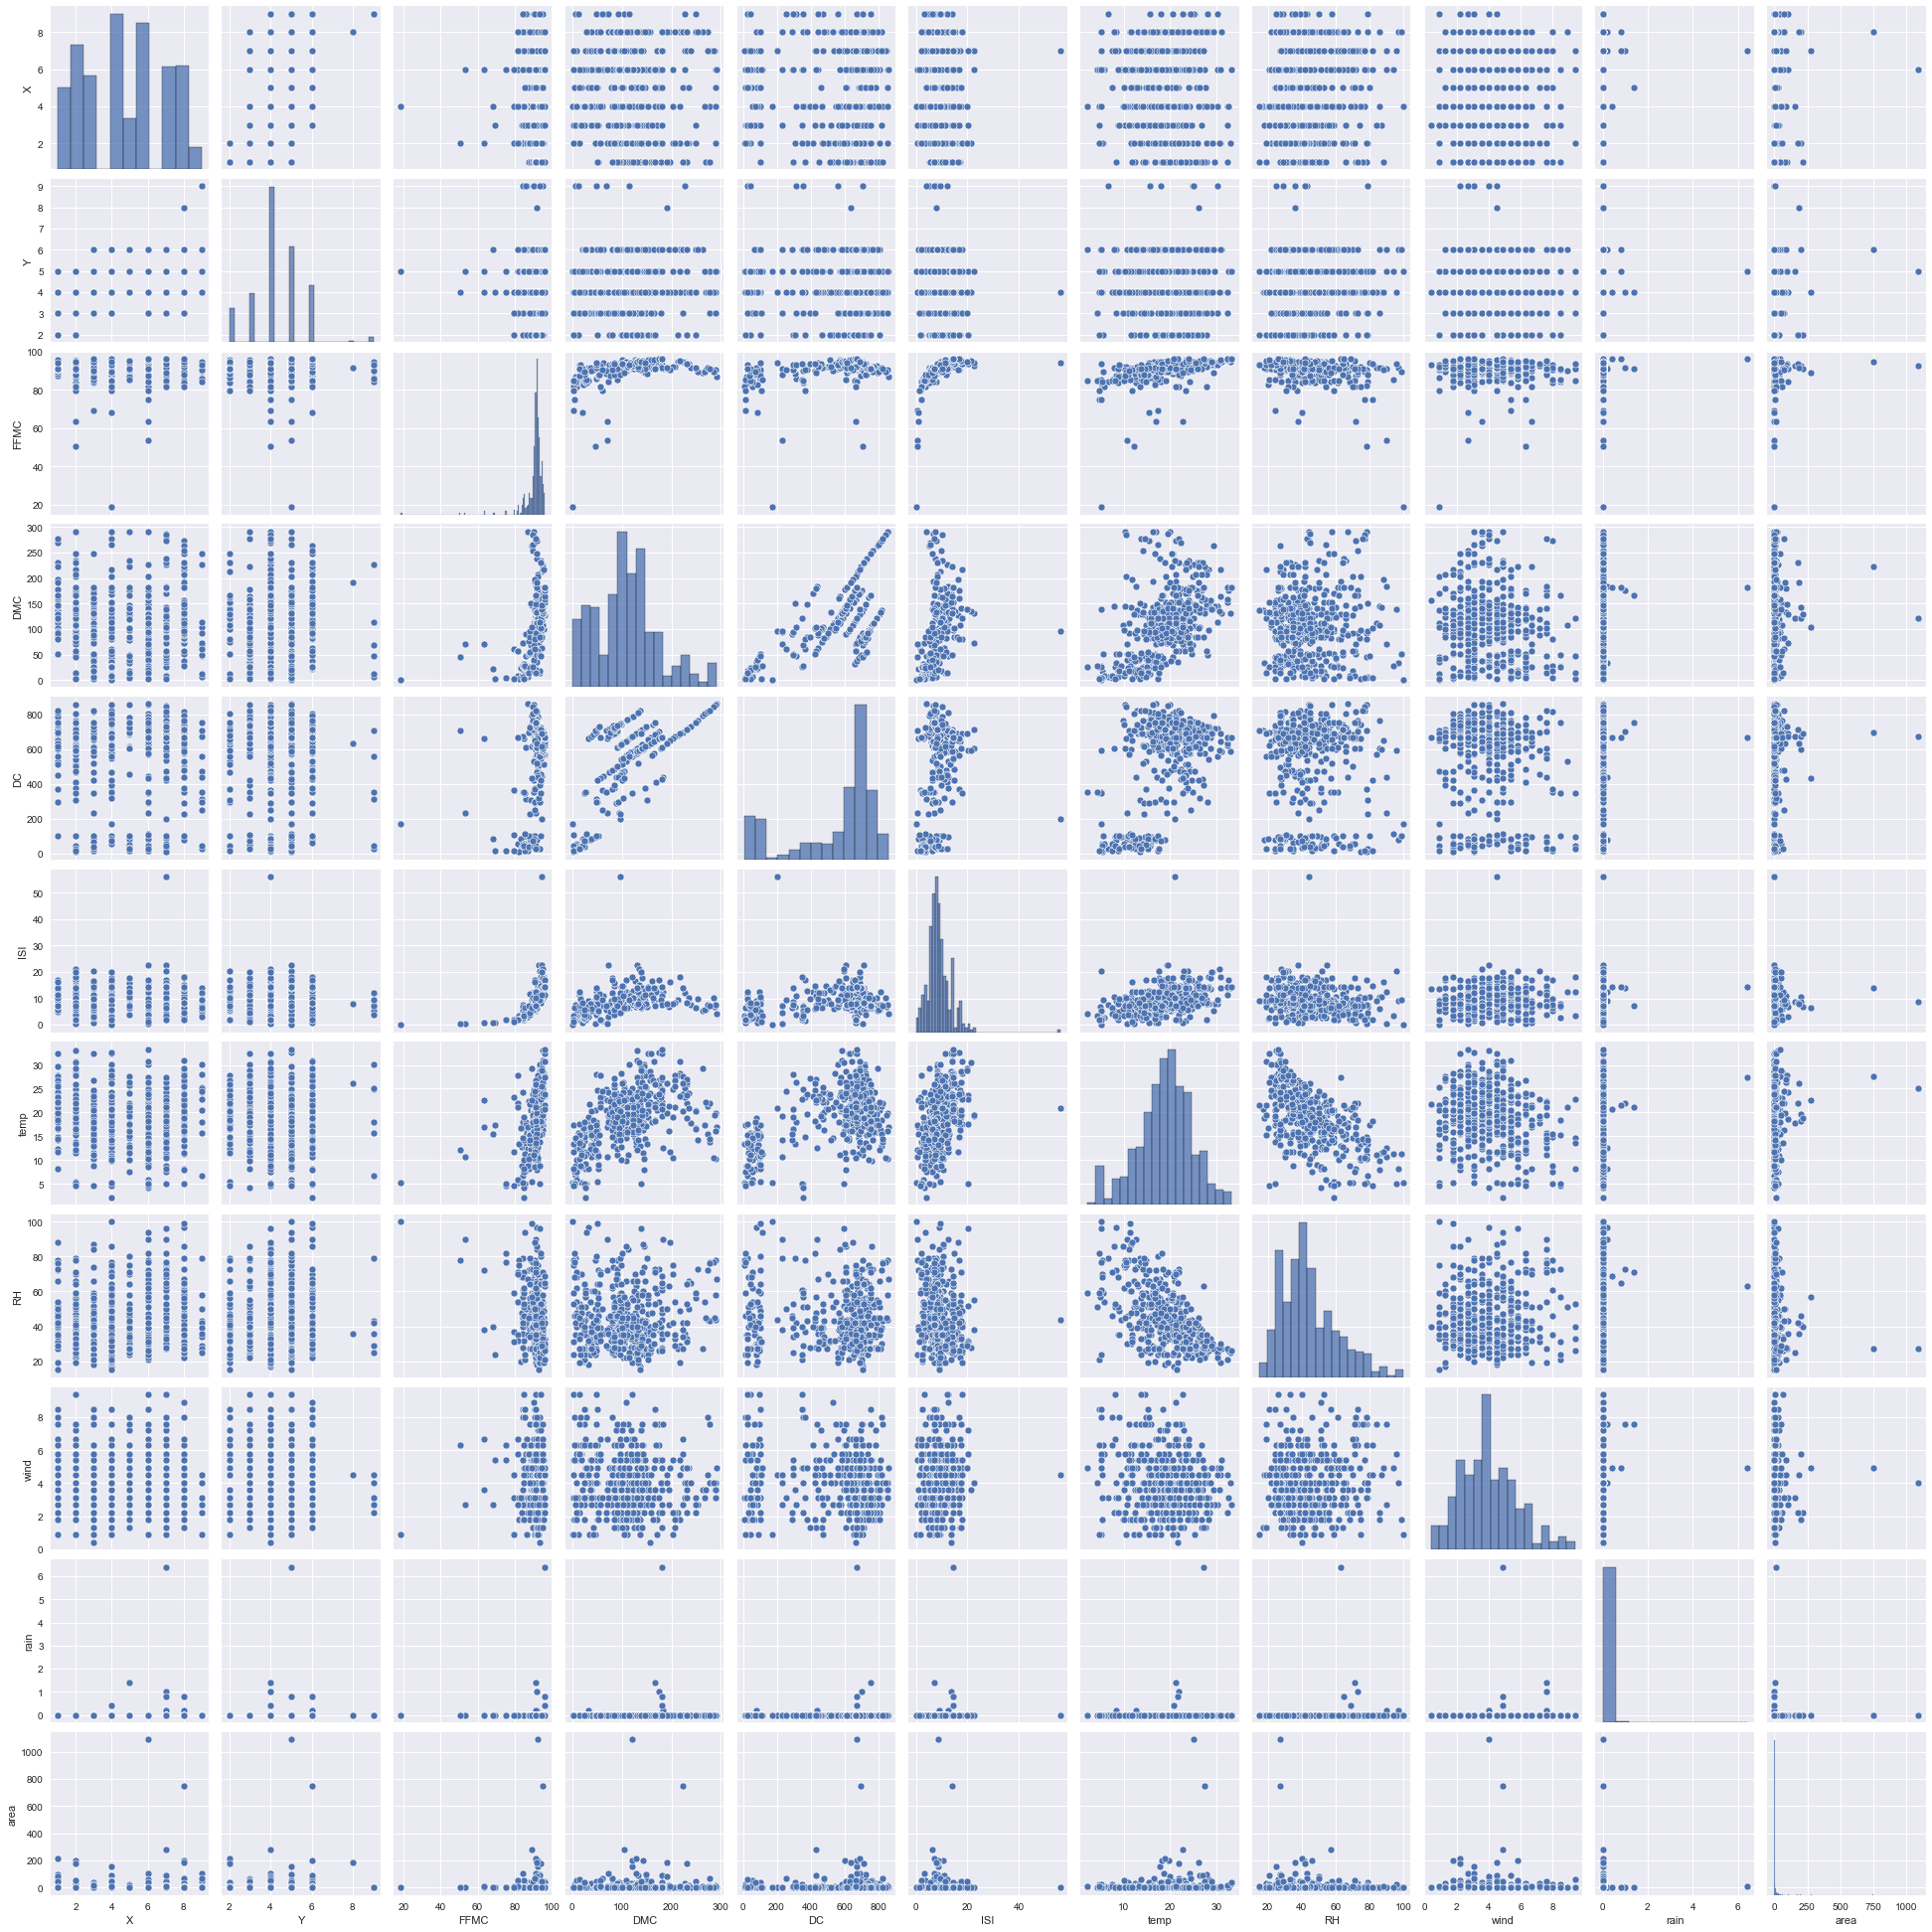

In [10]:
sns.pairplot(forest)

In [12]:
# Coverting the days and months into the integers
forest.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [13]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [14]:
forest.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [16]:
forest.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


<AxesSubplot:>

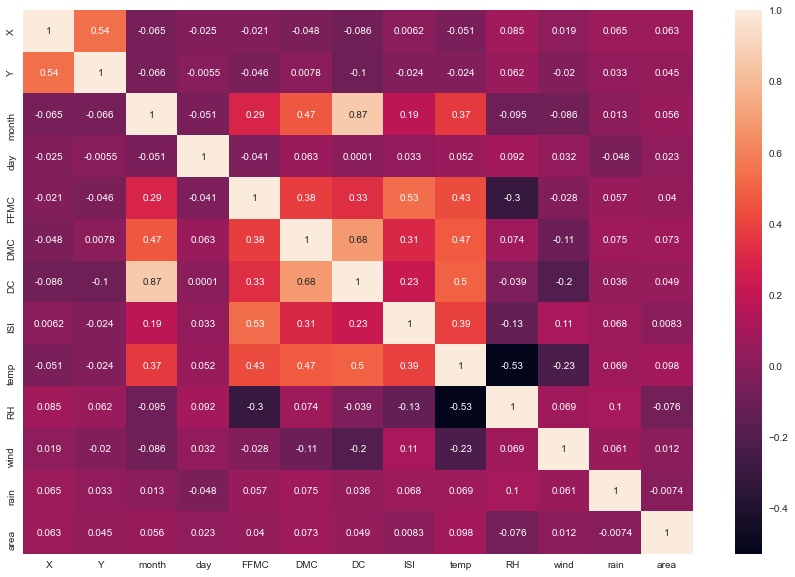

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(forest.corr(), annot=True)

In [23]:
from sklearn.model_selection import train_test_split
# dividing the data into test and training sets
train_set, test_set = train_test_split(forest, test_size=0.2, random_state=42)
work_set = train_set.copy() # assigning a copy of train set to work_set

In [24]:
train_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,4,3,9,6,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,9,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,5,4,2,7,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


In [25]:
test_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
304,6,5,5,6,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
501,7,5,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
441,8,6,8,1,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23
153,5,4,9,5,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46
503,2,4,8,3,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95


<AxesSubplot:xlabel='X', ylabel='Y'>

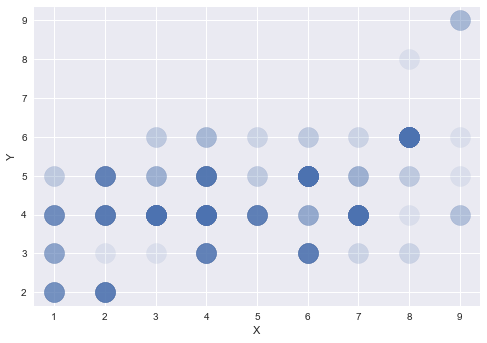

In [27]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=400) # scatter plot for the dataset

In [28]:
work_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,4,3,9,6,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,9,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,5,4,2,7,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


array([[<AxesSubplot:xlabel='temp', ylabel='temp'>]], dtype=object)

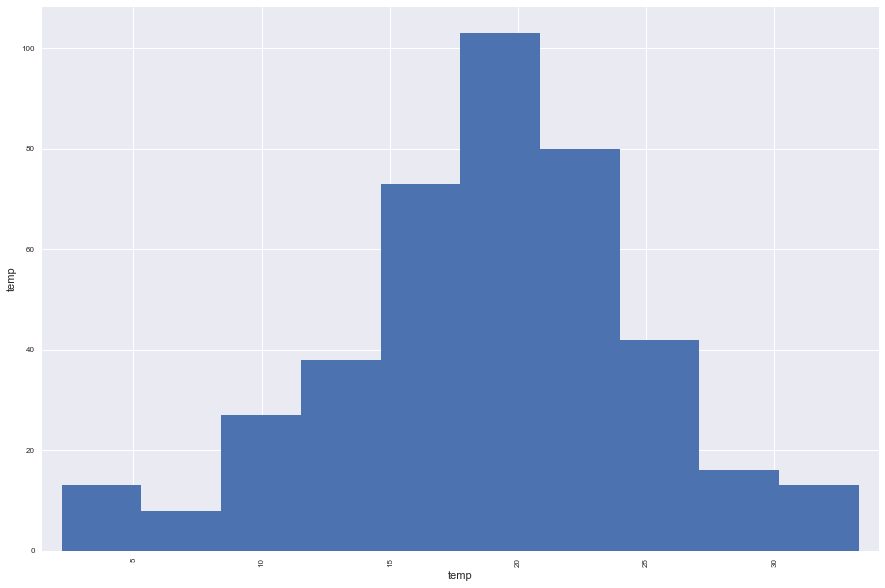

In [29]:
# Plotting the histogram for the temp attribute
from pandas.plotting import scatter_matrix

attributes = ['temp']
scatter_matrix(work_set[attributes], figsize=(15,10))

array([[<AxesSubplot:xlabel='DMC', ylabel='DMC'>]], dtype=object)

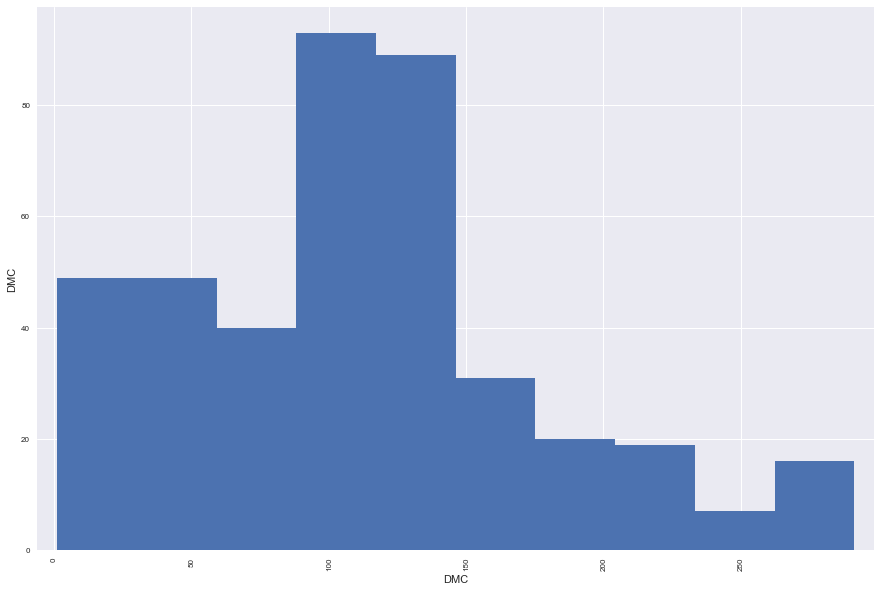

In [30]:
# Plotting the histogram for the DMC attribute
from pandas.plotting import scatter_matrix

attributes = ['DMC']
scatter_matrix(work_set[attributes], figsize=(15,10))

array([[<AxesSubplot:xlabel='area', ylabel='area'>]], dtype=object)

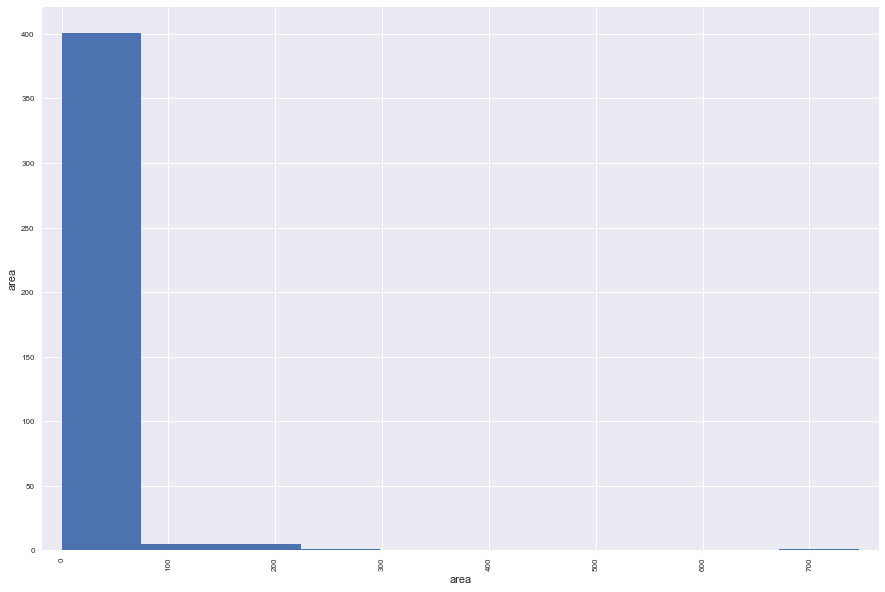

In [31]:
# Plotting the histogram for the area attribute
from pandas.plotting import scatter_matrix

attributes = ['area']
scatter_matrix(work_set[attributes], figsize=(15,10))